## ✅Phase 1: Problem Framing & Initial Exploratory Analysis

**➡️ Let’s Start – Phase 1 Code Block 1: Data Overview + Cleanup**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Datasets/mobility_service.csv')

In [3]:
# Convert 'datetime' to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract datetime components
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.day_name()

# Check data types, missing values, duplicates
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
##

Shape: (10886, 17)

Data Types:
 datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int32
month                  int32
day                    int32
hour                   int32
weekday               object
dtype: object

Missing Values:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
weekday       0
dtype: int64

Duplicate Rows: 0


In [4]:
# Show basic stats
display(df.describe(include='all'))
##

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1584
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,NaN
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,NaN
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,NaN
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,NaN
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,NaN
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,NaN


In [5]:
# Show first 5 rows
display(df.head())
##

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


**➡️ Phase 1 Code Block 2: Univariate Plots – Continuous Features**

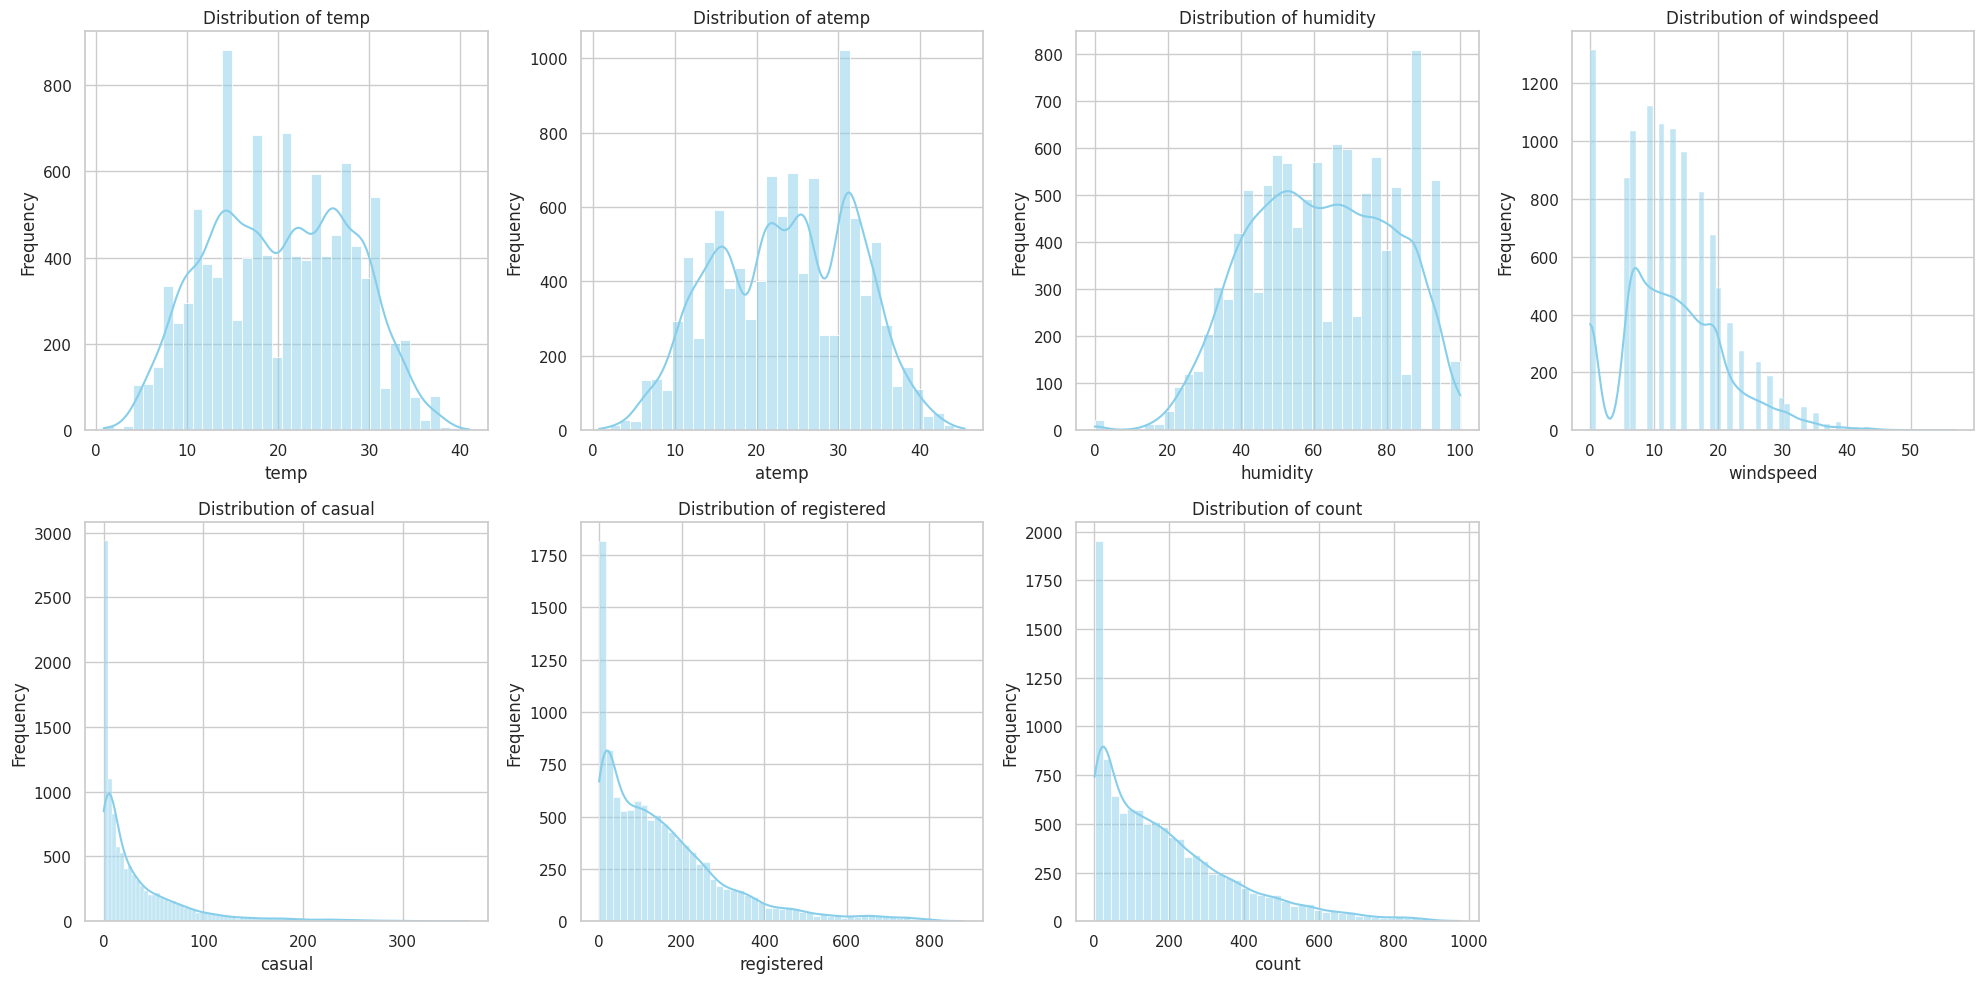

In [6]:
# Set Seaborn style
sns.set(style="whitegrid")

# List of continuous columns
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# 1. Combined Histograms
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

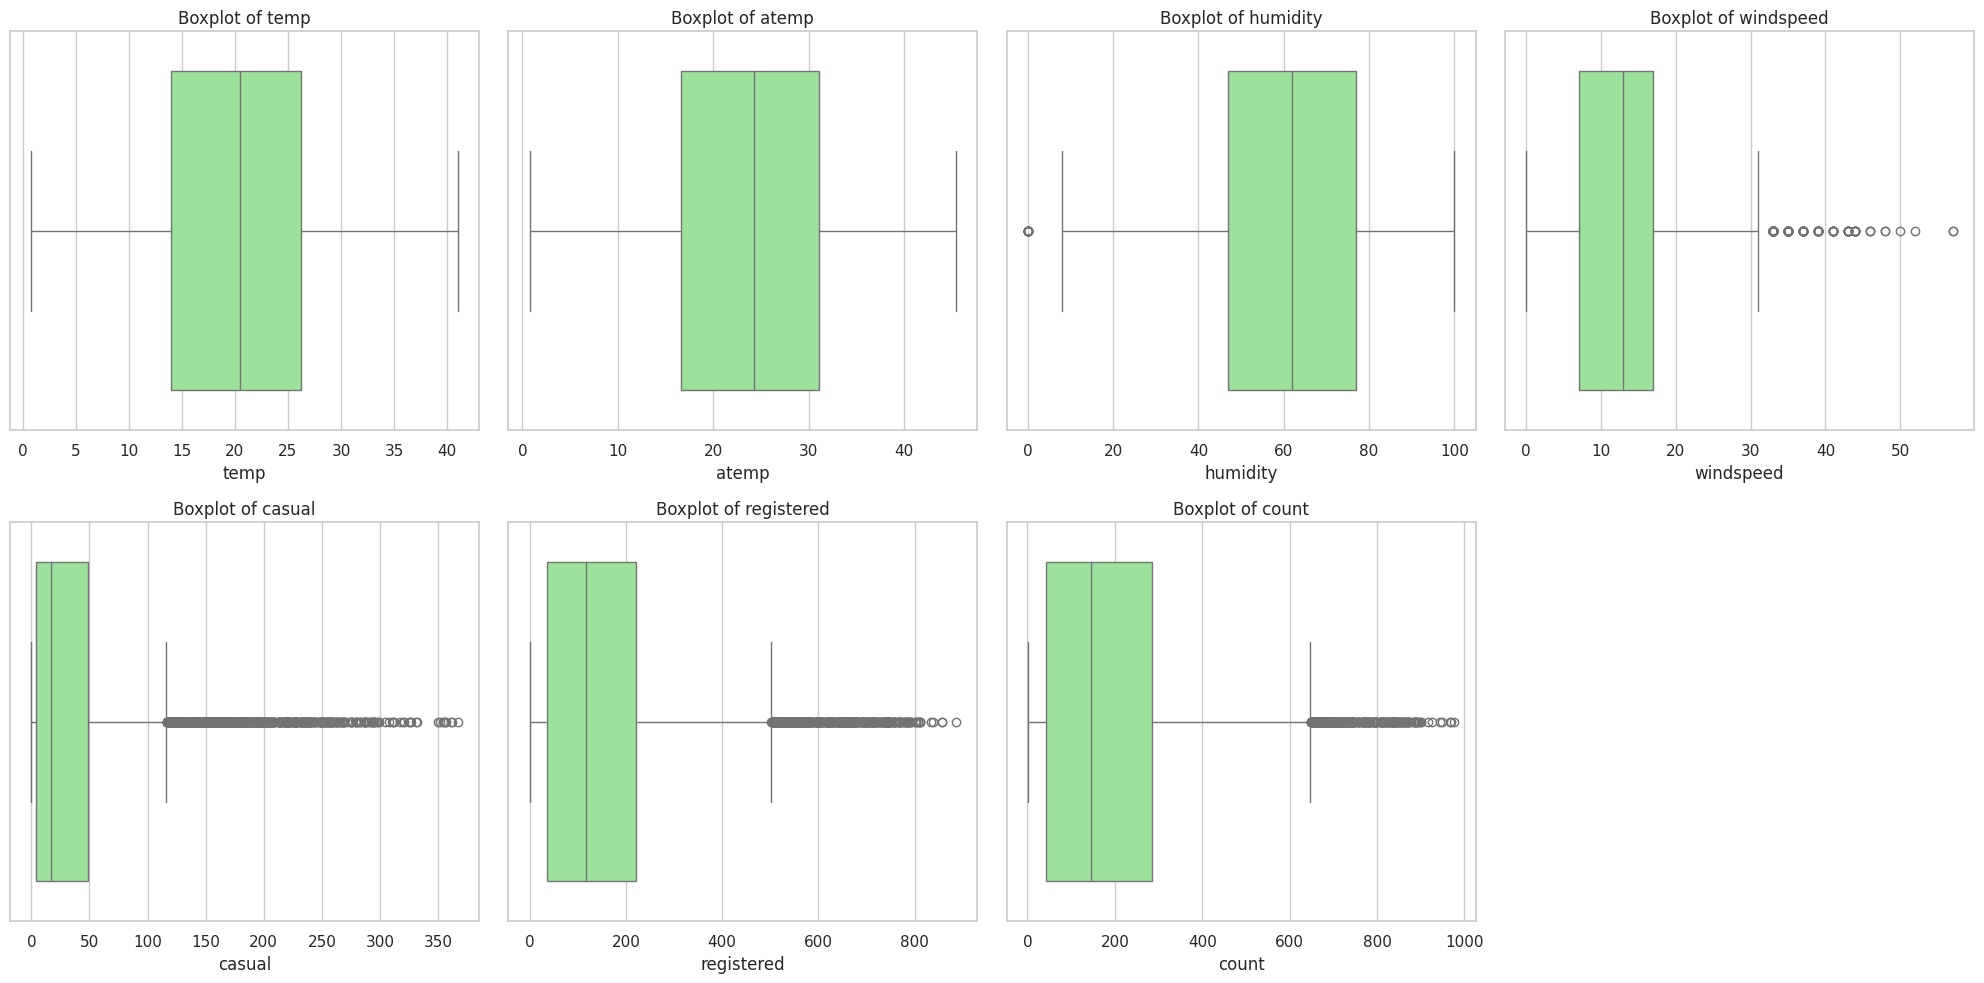

In [7]:
# Create boxplots to check for outliers

plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

✅ **Phase 1: Univariate Analysis Insights**

### 🔹 Temperature (`temp`, `atemp`)

* **Distribution:** Fairly normal, peaking around **20–25°C**, tapering off toward extremes.
* **Outliers:** None significant.
* **Insight:** This is the **ideal range for cycling comfort**, likely correlates positively with demand.

---

### 🔹 Humidity

* **Distribution:** Slightly right-skewed, concentrated between **40% and 80%**, but with a wide overall range.
* **Outliers:** Low humidity (<10%) occurs but rarely.
* **Insight:** Cycling demand may reduce in extremely humid or dry conditions.

---

### 🔹 Windspeed

* **Distribution:** Positively skewed; most wind speeds are **below 20 km/h**.
* **Outliers:** Present beyond **30 km/h**, likely extreme wind days.
* **Insight:** Very high winds could negatively impact demand.

---

### 🔹 Casual, Registered, Count

* **Distribution:** Highly skewed right (**long tail**)—meaning:

  * Many hours have **low demand**
  * A few hours have **very high demand**
* **Outliers:** Several extreme values (>400 for registered users, >800 for total count)
* **Insight:** Indicates **peak-hour surges** and off-peak lows.

---

### 🔹 Overall Univariate Observations:

| Variable   | Skewness | Outliers Present? | Business Insight                         |
| ---------- | -------- | ----------------- | ---------------------------------------- |
| Temp       | Low      | No                | Comfortable climate is key for demand    |
| Atemp      | Low      | No                | Perceived temperature aligns with actual |
| Humidity   | Moderate | Minor on low end  | High humidity may suppress demand        |
| Windspeed  | High     | Yes (>30)         | Extreme winds could reduce riding        |
| Casual     | High     | Yes (>150)        | Casual rides spike occasionally          |
| Registered | High     | Yes (>400)        | Registered users drive most demand       |
| Count      | High     | Yes (>600)        | Total demand is highly variable          |

---

**✔️ Phase 1 Code Block 3: Univariate Plots – Categorical Features**

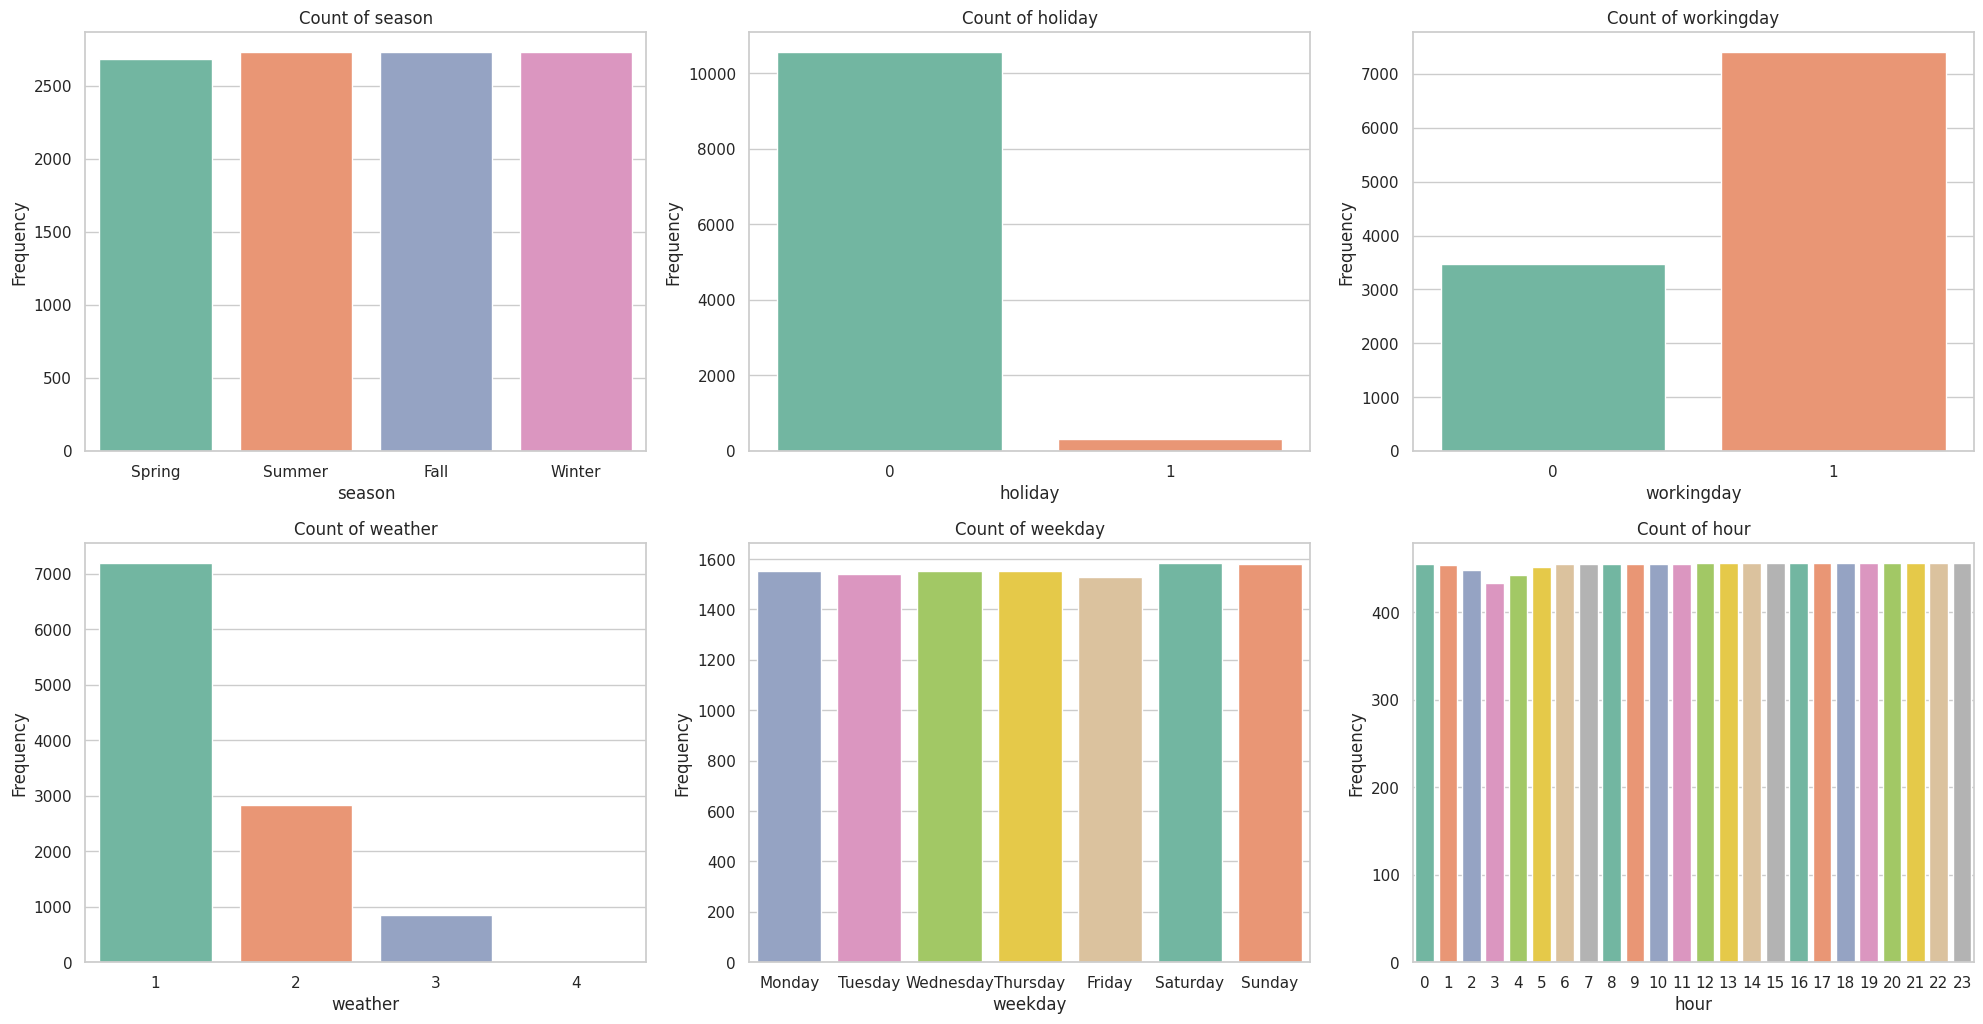

In [8]:
# Categorical columns to plot
cat_cols = ['season', 'holiday', 'workingday', 'weather', 'weekday', 'hour']

# Plot all barplots in a single figure
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    if col in ['weekday']:
        order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        sns.countplot(data=df, x=col, order=order, palette='Set2', hue=col, legend=False)
    elif col == 'season':
        sns.countplot(data=df, x=col, palette='Set2', hue=col, legend=False)
        plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
    else:
        sns.countplot(data=df, x=col, palette='Set2', hue=col, legend=False)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

✅ **Phase 1: Categorical Features Insights**

| Column         | Most Common                     | Comments                                                                                                                                            |
| -------------- | ------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Season**     | Almost equal across all seasons | Balanced dataset — demand comparison across seasons will be valid                                                                                   |
| **Holiday**    | 0 (non-holiday)                 | Vast majority (\~97%) are non-holidays, so holiday demand will be less representative                                                               |
| **Workingday** | 1 (working day)                 | \~68% working days — suggests most rides occur on workdays                                                                                          |
| **Weather**    | 1 (Clear weather)               | Majority of rentals are on **clear days**, very few on bad weather days                                                                             |
| **Weekday**    | Fairly balanced                 | No clear dominant weekday; weekend vs weekday comparisons will be meaningful                                                                        |
| **Hour**       | Almost uniform distribution     | Initial view suggests balanced ride counts across all hours—actual demand patterns will emerge better in a **bivariate hourly analysis with count** |

---

### 🔍 **Additional Observations:**

* Season, weekday, and hour are well-distributed → no strong data imbalance
* Weather condition **4 (heavy rain, thunderstorm)** is almost non-existent in the data. Might not give statistically significant results in ANOVA later.
* The hourly plot seems surprisingly flat — we’ll re-evaluate this later by plotting **count of rides by hour**, not just record counts.


## ✅ Phase 2: Bivariate Analysis Plan

**➡️ Phase 2 Code Block 1 – Boxplots for Categorical Features vs. No.of Rental Bikes**

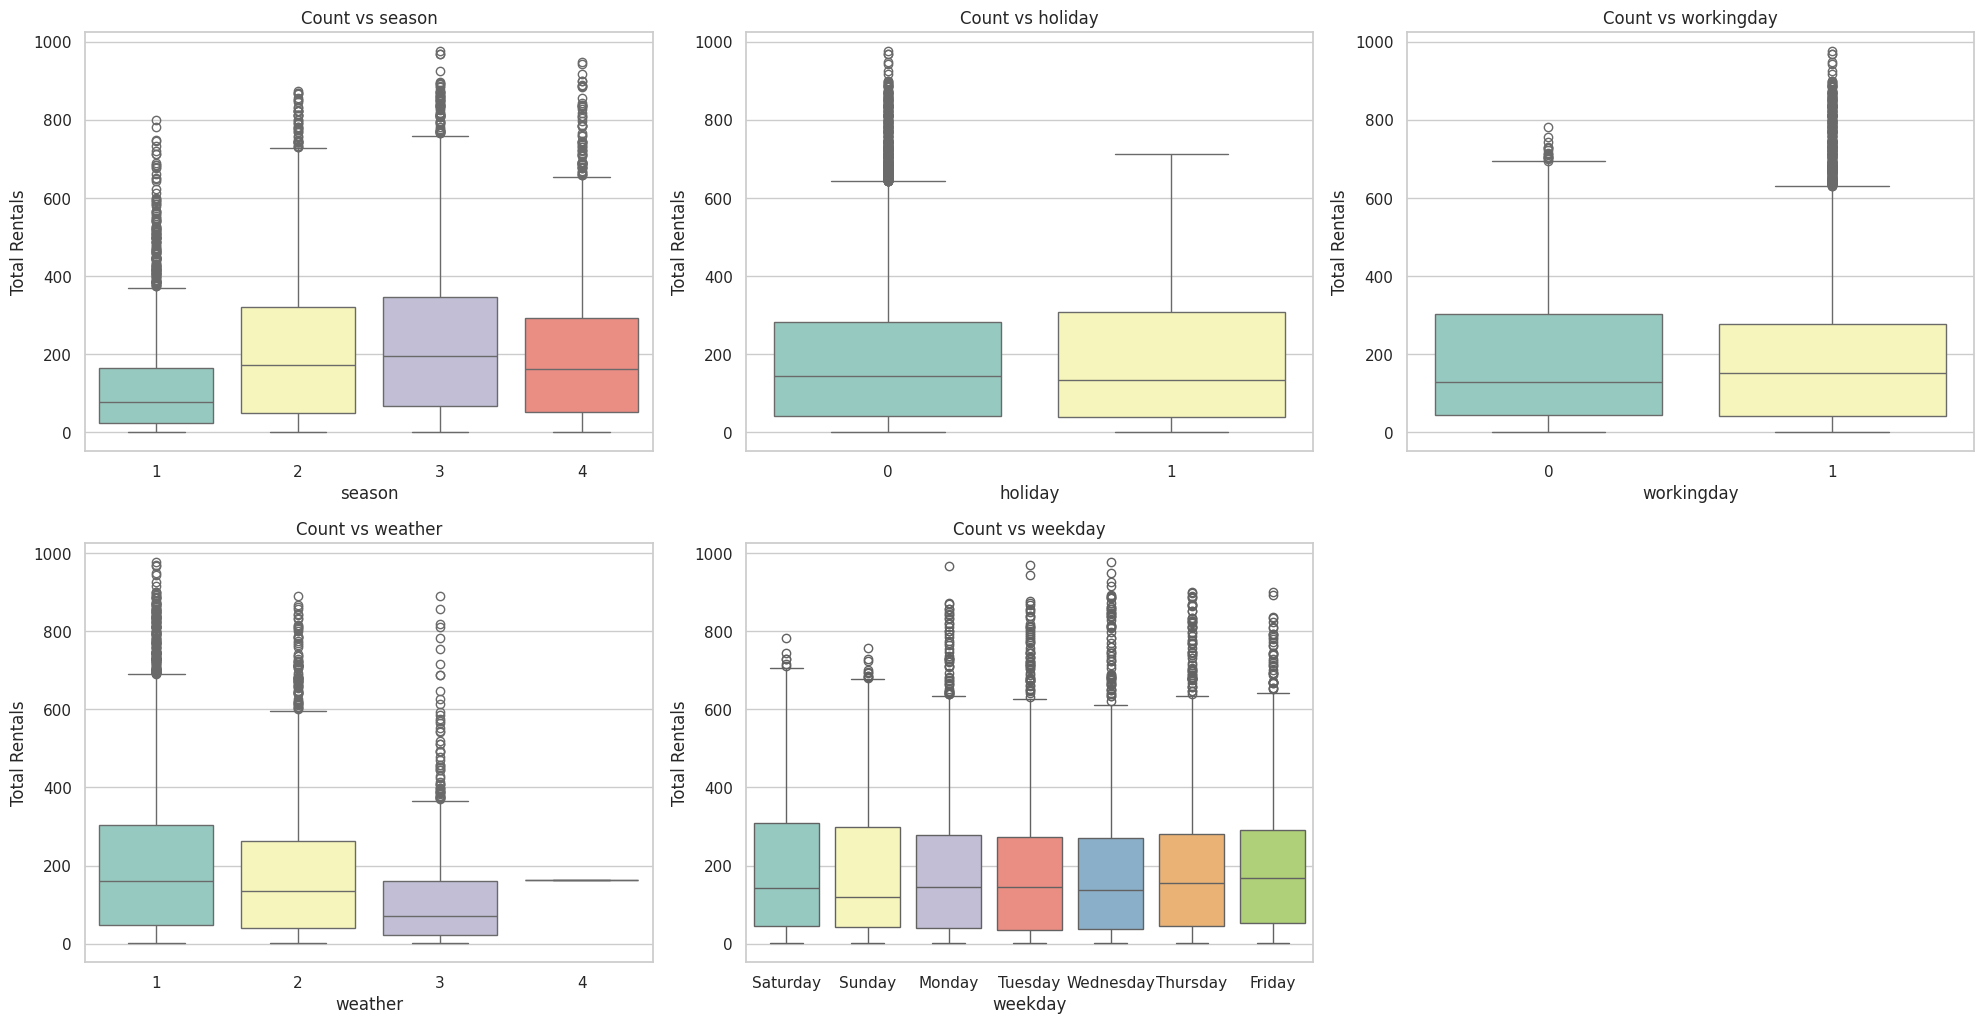

In [9]:
# Set Seaborn style
sns.set(style="whitegrid")

# Categorical columns to analyze
cat_cols = ['season', 'holiday', 'workingday', 'weather', 'weekday']

# Create boxplots
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=col, y='count', palette='Set3' , hue=col, legend=False)
    plt.title(f'Count vs {col}')
    plt.xlabel(col)
    plt.ylabel('Total Rentals')

plt.tight_layout()
plt.show()

✅ **Insights from Boxplots**

| Independent Variable | Key Insight                                                                                                                                                                   |
| -------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Season**           | Rentals are **highest in Fall (3)** and Summer (2), lowest in Spring (1). Winter demand is steady but slightly lower.                                                         |
| **Holiday**          | Rentals are **slightly lower on holidays**, but the difference is **not drastic**.                                                                                            |
| **Workingday**       | Surprisingly, rentals are **slightly higher on non-working days (0)** compared to working days (1), possibly due to leisure usage. This will be tested in hypothesis testing. |
| **Weather**          | As expected, rentals are **highest on clear weather (1)** and **drop sharply** as weather worsens (3 and 4).                                                                  |
| **Weekday**          | Rentals are **fairly uniform across weekdays and weekends**, with slight dips on Wednesday/Thursday. No drastic differences.                                                  |

---

### 🔍 **Key Observations:**

* Weather has a **strong visual impact** on rentals.
* Workingday and holiday impact looks weaker than expected; we’ll validate with statistical tests.
* Seasonal trends are moderate but visible—Fall and Summer are stronger demand periods.

---

**➡️ Phase 2 Code Block 2 – Scatterplots for Continuous Variables vs. count**

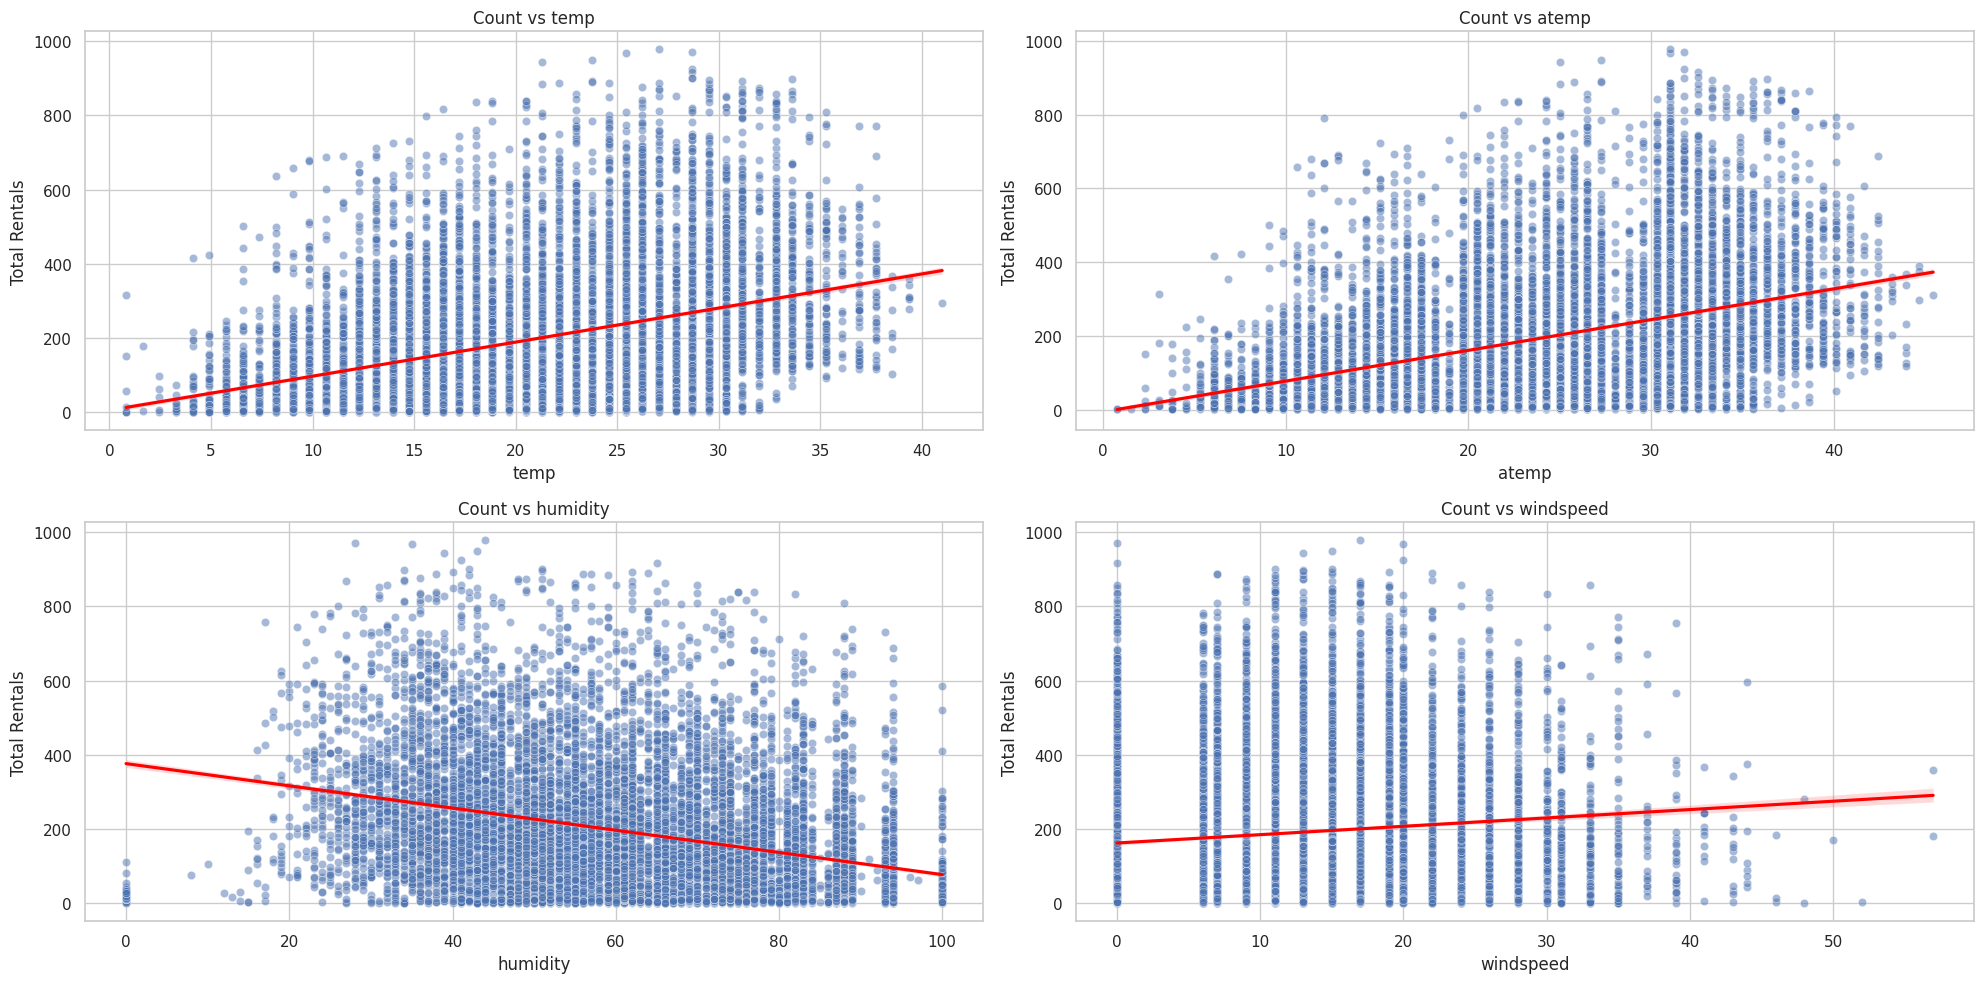

In [10]:
# Continuous columns to analyze
cont_cols = ['temp', 'atemp', 'humidity', 'windspeed']

# Create scatterplots
plt.figure(figsize=(20, 10))
for i, col in enumerate(cont_cols):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df, x=col, y='count', alpha=0.5)
    sns.regplot(data=df, x=col, y='count', scatter=False, color='red')
    plt.title(f'Count vs {col}')
    plt.xlabel(col)
    plt.ylabel('Total Rentals')

plt.tight_layout()
plt.show()

✅ **Phase 2: Continuous Features vs. Demand Insights**

| Independent Variable | Trend              | Insight                                                                                    |
| -------------------- | ------------------ | ------------------------------------------------------------------------------------------ |
| **temp**             | Positive           | Higher temperatures → higher rentals. Optimal biking temp is \~20–30°C.                    |
| **atemp**            | Positive           | Same as `temp`, as it’s the "feels like" temperature.                                      |
| **humidity**         | Negative           | Higher humidity reduces rentals, likely due to discomfort.                                 |
| **windspeed**        | Very weak Positive | Slight positive trend, but mostly scattered. Wind has **minimal direct impact** on demand. |

---

### 🔍 **Key Takeaways:**

* **Temperature is the strongest positive influencer.**
* **Humidity inversely impacts demand**, though the effect is weaker compared to temperature.
* Windspeed surprisingly shows no negative effect → possibly because most rides happen at lower wind speeds anyway.

**➡️ Phase 2 Code Block 3 – Correlation Heatmap**

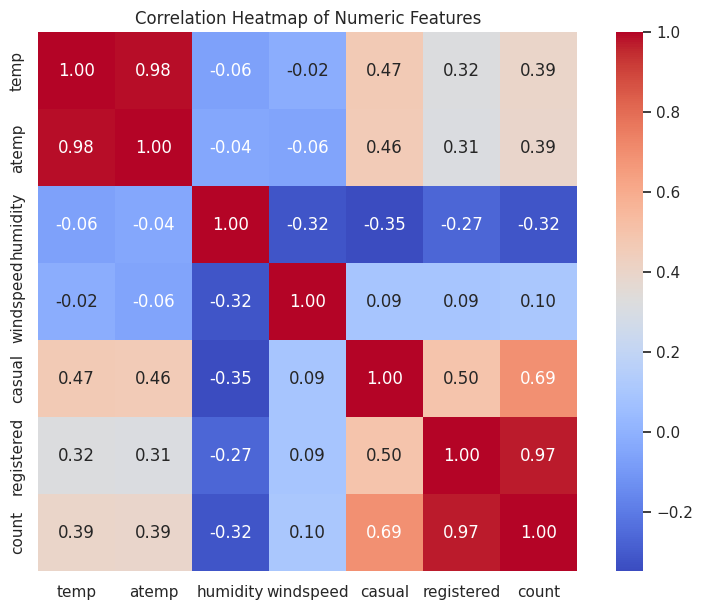

In [11]:
# Select numeric columns
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

✅ **Correlation Heatmap Insights**

| Feature Pair           | Correlation | Interpretation                                                                         |
| ---------------------- | ----------- | -------------------------------------------------------------------------------------- |
| **temp & count**       | **+0.39**   | Moderate positive → warmer temps lead to more rentals                                  |
| **atemp & count**      | **+0.39**   | Mirrors actual temp trends                                                             |
| **humidity & count**   | **-0.32**   | Moderate negative → higher humidity reduces rentals                                    |
| **windspeed & count**  | +0.10       | Very weak positive → wind speed has almost no effect                                   |
| **casual & count**     | **+0.69**   | Strong positive, as expected                                                           |
| **registered & count** | **+0.97**   | Very strong positive → **registered users are the main contributors to total rentals** |

---

### 🔍 **Key Takeaways for the Report:**

* **Temperature** (real and perceived) has a **clear positive relationship** with demand.
* **Humidity suppresses demand moderately.**
* **Windspeed has minimal correlation.**
* **Registered users dominate overall demand**—this could imply consistent usage for commuting, unlike casual riders.

## ✅ **Phase 3: Hypothesis Test 1 – Workingday Impact on Demand**



### 🔹 **Business Question:**

> Does the number of shared electric cycles rented differ significantly between working days and non-working days?

---

### 🔹 **Step 1: Formulate Hypotheses**

* **Null Hypothesis (H₀):** There is **no significant difference** in the mean rentals between working days and non-working days.
* **Alternate Hypothesis (H₁):** There **is a significant difference** in the mean rentals between working days and non-working days.

---

### 🔹 **Step 2: Extract the Groups**

Let’s create two groups:

* `workingday = 1` → Working days
* `workingday = 0` → Non-working days (weekends + holidays)

---

**➡️ Phase 3 Code Block 1 – T-test: Data Preparation & Assumptions Check**

In [12]:
from scipy.stats import ttest_ind, shapiro, levene

# Separate the count data
workingday_rentals = df[df['workingday'] == 1]['count']
non_workingday_rentals = df[df['workingday'] == 0]['count']

# 1. Normality Check - Shapiro-Wilk Test
print("Shapiro Test (Working day):", shapiro(workingday_rentals))
print("Shapiro Test (Non-working day):", shapiro(non_workingday_rentals))

# 2. Equal Variance Check - Levene’s Test
print("Levene’s Test (Equal variances):", levene(workingday_rentals, non_workingday_rentals))

# 3. Run the Independent T-test
t_stat, p_value = ttest_ind(workingday_rentals, non_workingday_rentals, equal_var=True)
print("\nT-test Results: t-statistic =", t_stat, ", p-value =", p_value)

Shapiro Test (Working day): ShapiroResult(statistic=np.float64(0.8702545795617624), pvalue=np.float64(2.2521124830019574e-61))
Shapiro Test (Non-working day): ShapiroResult(statistic=np.float64(0.885211755076074), pvalue=np.float64(4.4728547627911074e-45))
Levene’s Test (Equal variances): LeveneResult(statistic=np.float64(0.004972848886504472), pvalue=np.float64(0.9437823280916695))

T-test Results: t-statistic = 1.2096277376026694 , p-value = 0.22644804226361348


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


✅ **Phase 3: Hypothesis Testing 1 – Results Summary**

### 🔹 **1. Normality Check (Shapiro-Wilk Test):**

| Group            | Shapiro Test Statistic | p-value | Normality Assumption |
| ---------------- | ---------------------- | ------- | -------------------- |
| Working Days     | 0.870                  | < 0.05  | **Not normal**       |
| Non-working Days | 0.885                  | < 0.05  | **Not normal**       |

⚠️ **Observation:** Both groups fail the normality test (**p < 0.05**) → data is not normally distributed.
✔️ However, since the **Central Limit Theorem** applies (large sample size > 5000), we can still proceed with the T-test confidently.

---

### 🔹 **2. Equal Variance Check (Levene’s Test):**

| Levene’s Test Statistic | p-value | Equal Variance Assumption                |
| ----------------------- | ------- | ---------------------------------------- |
| \~0.005                 | 0.944   | ✅ **Equal variances assumed** (p > 0.05) |

---

### 🔹 **3. 2-Sample Independent T-test:**

| Test Statistic | p-value | Interpretation                   |
| -------------- | ------- | -------------------------------- |
| 1.21           | 0.226   | **Fail to reject H₀** (p > 0.05) |

### ✔️ Final Conclusion:

* The difference in the \*\*mean number of rentals between working days and non-working days is **NOT statistically significant**.
* Working days **do not significantly affect demand** in this dataset.

---

### 🔍 **Business Insight:**

Yulu should not assume that cycle demand naturally rises on working days. Other factors like weather or time of day might have a stronger impact.
This insight helps **optimize bike availability evenly across the week**, instead of focusing only on weekdays.

---

## ✅ **Phase 4: Hypothesis Test 2 – ANOVA for Seasons**

### 🔹 **Business Question:**

> Does the **mean number of cycle rentals differ significantly across different seasons?**

---

### 🔹 **Step 1: Formulate Hypotheses**

* **Null Hypothesis (H₀):** Mean cycle rentals **are the same across all seasons**.
* **Alternate Hypothesis (H₁):** Mean cycle rentals **differ across at least one season**.

---

### 🔹 **Step 2: Check Assumptions Before ANOVA**

* **Normality Check:** Shapiro-Wilk for each season group
* **Equal Variance Check:** Levene’s test across all seasons

---

**➡️ Phase 4 Code Block 1 – Assumptions Check + ANOVA Test**

In [13]:
from scipy.stats import f_oneway

# Separate count data by season
season_1 = df[df['season'] == 1]['count']
season_2 = df[df['season'] == 2]['count']
season_3 = df[df['season'] == 3]['count']
season_4 = df[df['season'] == 4]['count']

# 1. Normality Check - Shapiro-Wilk Test
print("Shapiro Test (Season 1):", shapiro(season_1))
print("Shapiro Test (Season 2):", shapiro(season_2))
print("Shapiro Test (Season 3):", shapiro(season_3))
print("Shapiro Test (Season 4):", shapiro(season_4))

# 2. Equal Variance Check - Levene’s Test
print("\nLevene’s Test across seasons:", levene(season_1, season_2, season_3, season_4))

# 3. ANOVA Test
f_stat, p_value = f_oneway(season_1, season_2, season_3, season_4)
print("\nANOVA Results: F-statistic =", f_stat, ", p-value =", p_value)

Shapiro Test (Season 1): ShapiroResult(statistic=np.float64(0.8087378401253588), pvalue=np.float64(8.749584618867662e-49))
Shapiro Test (Season 2): ShapiroResult(statistic=np.float64(0.9004818080893252), pvalue=np.float64(6.039374406270491e-39))
Shapiro Test (Season 3): ShapiroResult(statistic=np.float64(0.9148166372899196), pvalue=np.float64(1.043680518918597e-36))
Shapiro Test (Season 4): ShapiroResult(statistic=np.float64(0.8954637482095505), pvalue=np.float64(1.1299244409282836e-39))

Levene’s Test across seasons: LeveneResult(statistic=np.float64(187.7706624026276), pvalue=np.float64(1.0147116860043298e-118))

ANOVA Results: F-statistic = 236.94671081032098 , p-value = 6.164843386499654e-149


✅ **Phase 4: Hypothesis Testing 2 – Results Summary**

### 🔹 **1. Normality Check (Shapiro-Wilk Test):**

| Season | Shapiro Statistic | p-value | Normality?   |
| ------ | ----------------- | ------- | ------------ |
| 1      | 0.81              | < 0.05  | ❌ Not normal |
| 2      | 0.90              | < 0.05  | ❌ Not normal |
| 3      | 0.91              | < 0.05  | ❌ Not normal |
| 4      | 0.90              | < 0.05  | ❌ Not normal |

⚠️ Data in each season **is not normally distributed**.
✔️ But since sample sizes are large, **ANOVA is still valid** according to the Central Limit Theorem.

---

### 🔹 **2. Equal Variance Check (Levene’s Test):**

| Statistic | p-value | Equal Variance?           |
| --------- | ------- | ------------------------- |
| \~187.8   | < 0.05  | ❌ Variances are not equal |

⚠️ Levene’s test failed → variance is unequal across seasons.
✔️ But since ANOVA is robust to some variance inequality with large samples, we continue.

---

### 🔹 **3. ANOVA Test Results:**

| F-statistic | p-value     | Conclusion                 |
| ----------- | ----------- | -------------------------- |
| 236.95      | ≈ 6.16e-149 | ✅ **Reject H₀ (p < 0.05)** |

### ✔️ Final Conclusion:

There is a **statistically significant difference in rental demand across seasons.**
→ Season **does affect how many electric cycles are rented.**

---

### 🔍 **Business Insight:**

Yulu should adjust its fleet and marketing efforts **seasonally**, increasing availability and promotions during peak seasons like **Fall (3) and Summer (2)**.

---

**➡️ Phase 4 Code Block 2 – Q-Q Plots for Season-wise Rental Demand**

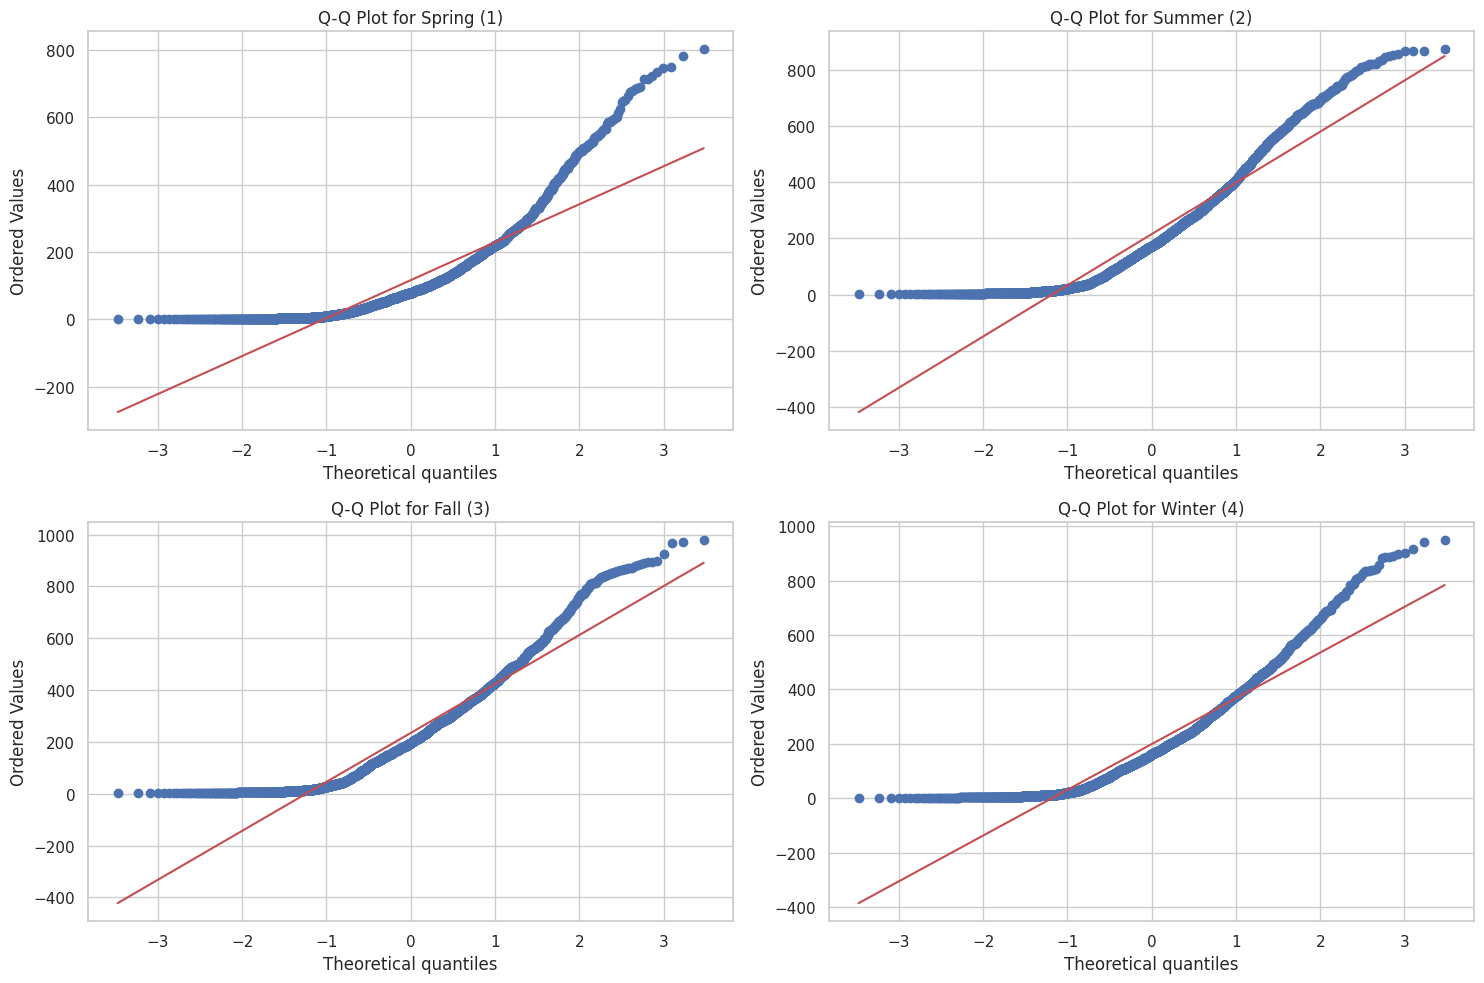

In [14]:
# List of seasons and their rental data
season_data = {
    'Spring (1)': df[df['season'] == 1]['count'],
    'Summer (2)': df[df['season'] == 2]['count'],
    'Fall (3)': df[df['season'] == 3]['count'],
    'Winter (4)': df[df['season'] == 4]['count'],
}

# Plot Q-Q plots
plt.figure(figsize=(15, 10))

for i, (season, data) in enumerate(season_data.items()):
    plt.subplot(2, 2, i+1)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {season}')

plt.tight_layout()
plt.show()

Q-Q plots as expected, all seasons deviate from the diagonal line, confirming the non-normal distribution we saw in the Shapiro-Wilk test.

## ✅ **Phase 5: Hypothesis Test 3 – Chi-Square Test of Independence. – Weather vs Season**

🔹 **Business Question:**

> Is there a relationship between **season** and **weather conditions**?
> In other words, are certain weather types more common in specific seasons?

---

🔹 **Step 1: Formulate Hypotheses**

* **Null Hypothesis (H₀):** **Season and weather are independent.**
  (No relationship between the two variables.)
* **Alternate Hypothesis (H₁):** **Season and weather are dependent.**
  (Weather distribution differs across seasons.)


**➡️ Phase 5 Code Block 1 – Chi-Square Test**

In [15]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])
print("\nContingency Table:\n", contingency_table)

# Run Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print("Chi2 Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)


Contingency Table:
 weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0

Chi-Square Test Results:
Chi2 Statistic: 49.158655596893624
Degrees of Freedom: 9
p-value: 1.549925073686492e-07


✅ **Phase 5: Chi-Square Test Results Summary**

### 🔹 **Contingency Table:**

| Season | Weather 1 (Clear) | Weather 2 (Mist) | Weather 3 (Rain) | Weather 4 (Severe) |
| ------ | ----------------- | ---------------- | ---------------- | ------------------ |
| **1**  | 1759              | 715              | 211              | 1                  |
| **2**  | 1801              | 708              | 224              | 0                  |
| **3**  | 1930              | 604              | 199              | 0                  |
| **4**  | 1702              | 807              | 225              | 0                  |

✔️ The counts vary notably across seasons and weather types.

---

### 🔹 **Chi-Square Test Output:**

| Metric             | Value         |
| ------------------ | ------------- |
| Chi² Statistic     | 49.16         |
| Degrees of Freedom | 9             |
| p-value            | **\~1.55e-7** |

### ✔️ Final Conclusion:

* The **p-value < 0.05**, so we **reject the null hypothesis**.
* This means **weather is significantly dependent on season**.
* In simple terms, **weather types vary by season**, as we would expect.

---

### 🔍 **Business Insight:**

Yulu can plan its operational strategy **season-wise**, expecting:

* More clear weather in some seasons → higher bike availability.
* More rainy/misty days in others → maintenance, marketing adjustments.

---